In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pickle



In [12]:
df=pd.read_csv("Data/student_performance.csv")
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [37]:
df.isna().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [23]:
# Features and target variable
X = df.drop(columns=['StudentID', 'Name', 'FinalGrade'])
y = df['FinalGrade']
X


,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport
0,Male,85,15,78,1,High
1,Female,90,20,85,2,Medium
2,Male,78,10,65,0,Low
3,Male,92,25,90,3,High
4,Female,88,18,82,2,Medium
5,Female,95,30,88,1,High
6,Male,70,8,60,0,Low
7,Female,85,17,77,1,Medium
8,Male,82,12,70,2,Low
9,Female,91,22,86,3,High


In [39]:
df.dtypes

StudentID                     int64
Name                         object
Gender                       object
AttendanceRate                int64
StudyHoursPerWeek             int64
PreviousGrade                 int64
ExtracurricularActivities     int64
ParentalSupport              object
FinalGrade                    int64
dtype: object

In [47]:


# Initialize LabelEncoder
le = LabelEncoder()

# Convert 'Name' column to integers
df['Name'] = le.fit_transform(df['Name'])

# Convert 'Gender' column to integers
df['Gender'] = le.fit_transform(df['Gender'])

# Convert 'ParentalSupport' column to integers
df['ParentalSupport'] = le.fit_transform(df['ParentalSupport'])

# Display the DataFrame with converted values
print(df)


   StudentID  Name  Gender  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
0          1     5       1              85                 15             78   
1          2     8       0              90                 20             85   
2          3     0       1              78                 10             65   
3          4     6       1              92                 25             90   
4          5     2       0              88                 18             82   
5          6     7       0              95                 30             88   
6          7     1       1              70                  8             60   
7          8     9       0              85                 17             77   
8          9     4       1              82                 12             70   
9         10     3       0              91                 22             86   

   ExtracurricularActivities  ParentalSupport  FinalGrade  
0                          1                0          80  

In [41]:
# Preprocessing: OneHotEncode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'ParentalSupport'])
    ])


In [43]:
df.dtypes

StudentID                     int64
Name                         object
Gender                       object
AttendanceRate                int64
StudyHoursPerWeek             int64
PreviousGrade                 int64
ExtracurricularActivities     int64
ParentalSupport              object
FinalGrade                    int64
dtype: object

In [27]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])




In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AttendanceRate',
                                                   'StudyHoursPerWeek',
                                                   'PreviousGrade',
                                                   'ExtracurricularActivities']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'ParentalSupport'])])),
                ('model', LinearRegression())])

In [31]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

In [33]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(5.374785130626009, 0.31366900432835143)

In [51]:
# Set the style
sns.set(style="whitegrid")



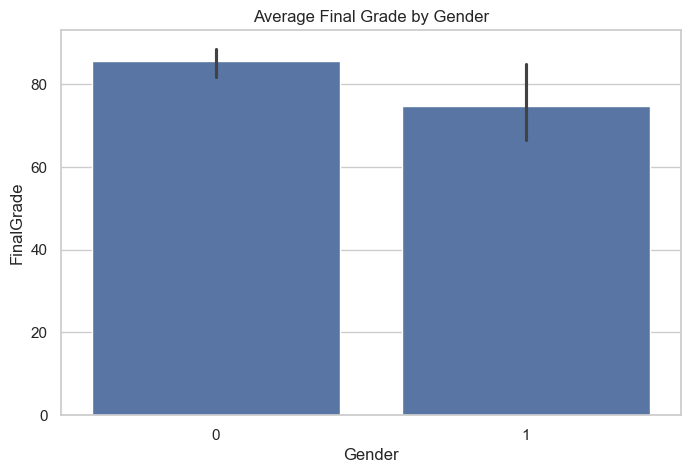

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='FinalGrade', data=df)
plt.title('Average Final Grade by Gender')
plt.show()


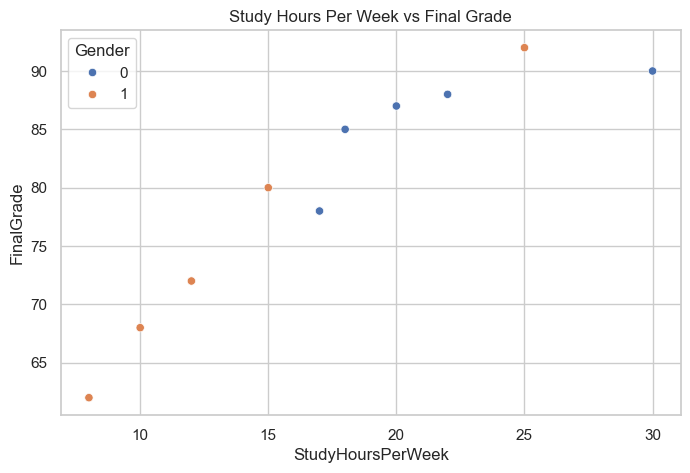

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='StudyHoursPerWeek', y='FinalGrade', hue='Gender', data=df)
plt.title('Study Hours Per Week vs Final Grade')
plt.show()

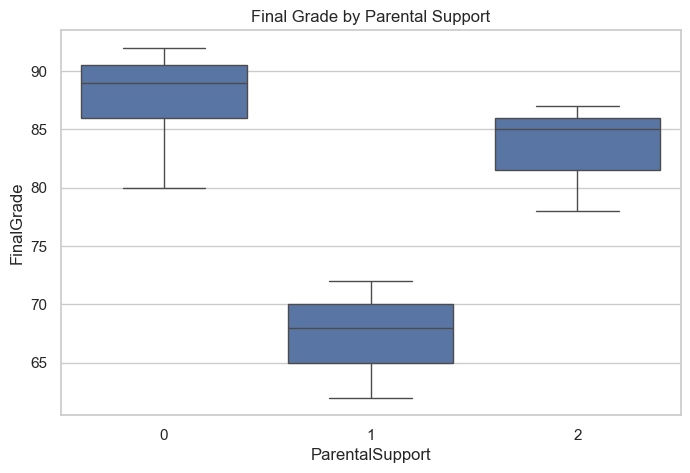

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df)
plt.title('Final Grade by Parental Support')
plt.show()



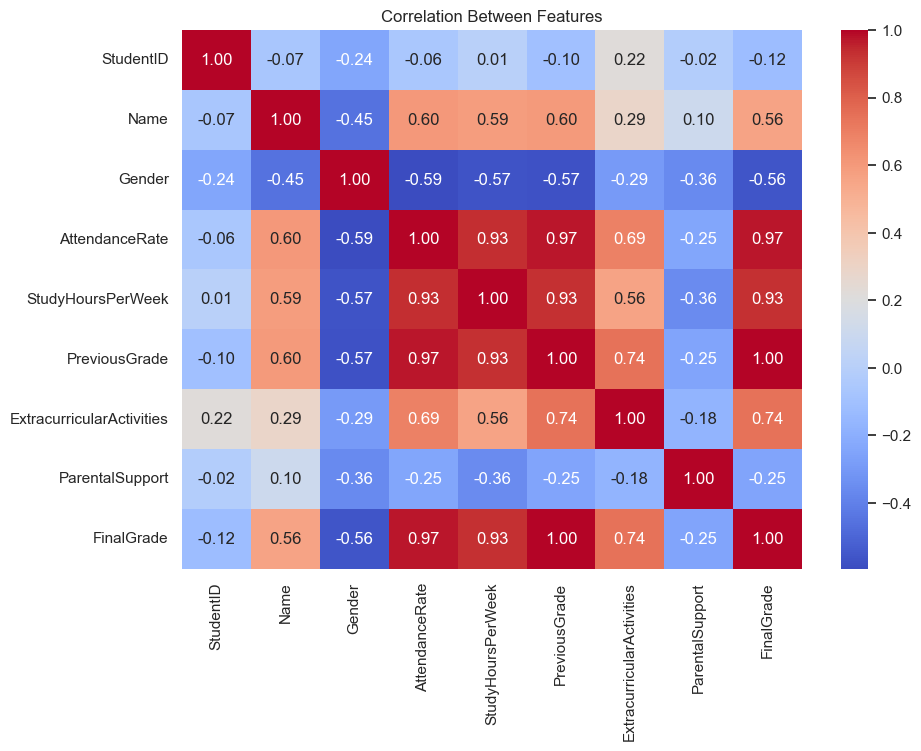

In [59]:
plt.figure(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()

In [63]:
with open('final_grade_predictor.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Model has been pickled successfully!")

Model has been pickled successfully!
